In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#########################################################################
################# specifying path of the directories ####################
#########################################################################
DATA_DIR = "../input/distracted-driver-dataset/imgs"
TEST_DIR  = os.path.join(DATA_DIR,"test")
TRAIN_DIR = os.path.join(DATA_DIR,"train")

MODEL_PATH = os.path.join(os.getcwd(),"model","self_trained")
#PICKLE_DIR = os.path.join(os.getcwd(),"pickle_files")
CSV_DIR = os.path.join(os.getcwd(),"csv_files")

In [3]:
MODEL_PATH

'/kaggle/working/model/self_trained'

In [4]:
###############################################
############ Creating Directories #############
###############################################
if not os.path.exists(TRAIN_DIR):
    print("Training data does not exists")
if not os.path.exists(TEST_DIR):
    print("Testing data does not exists")
############################################    
if not os.path.exists(MODEL_PATH):
    print("Model path does not exists")
    os.makedirs(MODEL_PATH)
    print("Model path created")
############################################
if not os.path.exists(CSV_DIR):
    print("Csv path does not exist")
    os.makedirs(CSV_DIR)
    print("Csv path created")

Model path does not exists
Model path created
Csv path does not exist
Csv path created


# Processing data in the required format

In [5]:
def create_csv(dir_name,filename):
    class_names = os.listdir(dir_name) # train , test
    data = list()
    
    if(os.path.isdir(os.path.join(dir_name,class_names[0]))):            # if in train file
        for class_name in class_names:                                   # which class in the train file
            file_names = os.listdir(os.path.join(dir_name,class_name))   # images in this class (c0, c1, ...., c9)
            for file in file_names:                                      # create a dic of the image path and its class name(c0, c1, ...., c9)
                data.append({
                    "Filename":os.path.join(dir_name,class_name,file),
                    "ClassName":class_name
                })
    else:                                                                 # if in test file
        class_name = "test"
        file_names = os.listdir(dir_name)                                 # images in the test file
        for file in file_names:                                           # create a dic of the image path and its class name (test)
            data.append(({
                "FileName":os.path.join(dir_name,file),
                "ClassName":class_name
            }))
    
    data = pd.DataFrame(data)                                               # create a DataFrame using Pandas
    data.to_csv(os.path.join(os.getcwd(),"csv_files",filename),index=False) # convert the DataFrame to CSV file


In [6]:
create_csv(TRAIN_DIR,"train.csv")
create_csv(TEST_DIR,"test.csv")

In [7]:
data_train = pd.read_csv(os.path.join(os.getcwd(),"csv_files","train.csv"))
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22424 entries, 0 to 22423
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Filename   22424 non-null  object
 1   ClassName  22424 non-null  object
dtypes: object(2)
memory usage: 350.5+ KB


In [8]:
data_train.head()

,Filename,ClassName
0,../input/distracted-driver-dataset/imgs/train/...,c5
1,../input/distracted-driver-dataset/imgs/train/...,c5
2,../input/distracted-driver-dataset/imgs/train/...,c5
3,../input/distracted-driver-dataset/imgs/train/...,c5
4,../input/distracted-driver-dataset/imgs/train/...,c5


In [9]:
data_test = pd.read_csv(os.path.join(os.getcwd(),"csv_files","test.csv"))
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79726 entries, 0 to 79725
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   FileName   79726 non-null  object
 1   ClassName  79726 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [10]:
data_train['ClassName'].value_counts()

c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: ClassName, dtype: int64

In [11]:
data_train.describe()

,Filename,ClassName
count,22424,22424
unique,22424,10
top,../input/distracted-driver-dataset/imgs/train/...,c0
freq,1,2489


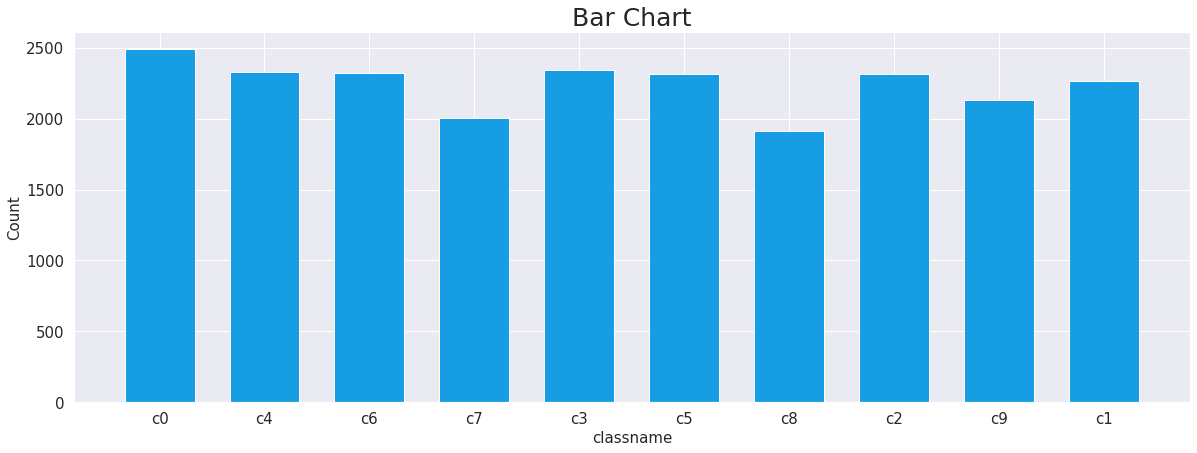

In [12]:
sns.set()

count_img_in_each_class= data_train['ClassName'].value_counts(sort=False)
categories = data_train['ClassName'].value_counts(sort=False).index.tolist()

y = np.array(count_img_in_each_class)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(20,15))
ay = fig.add_subplot(211)

plt.xticks(x, categories, size=15)
plt.yticks(size=15)

ay.bar(x, y, width, color="#169DE3")

plt.title('Bar Chart',size=25)
plt.xlabel('classname',size=15)
plt.ylabel('Count',size=15)

plt.show()

In [13]:
labels_list = list(set(data_train['ClassName'].values))
labels_list

['c7', 'c2', 'c5', 'c8', 'c1', 'c4', 'c6', 'c9', 'c0', 'c3']

In [14]:
###################################################
#### Changing ClassName to Categorical Value ######
###################################################
import re
for label in labels_list : 
    id=re.findall('\d+',label)[0]
    data_train['ClassName'].replace(label,id,inplace=True)
data_train

,Filename,ClassName
0,../input/distracted-driver-dataset/imgs/train/...,5
1,../input/distracted-driver-dataset/imgs/train/...,5
2,../input/distracted-driver-dataset/imgs/train/...,5
3,../input/distracted-driver-dataset/imgs/train/...,5
4,../input/distracted-driver-dataset/imgs/train/...,5
...,...,...
22419,../input/distracted-driver-dataset/imgs/train/...,0
22420,../input/distracted-driver-dataset/imgs/train/...,0
22421,../input/distracted-driver-dataset/imgs/train/...,0
22422,../input/distracted-driver-dataset/imgs/train/...,0


In [15]:
#################################################
############### one hot encoding ################
#################################################
from keras.utils import to_categorical
labels = to_categorical(data_train['ClassName'])
print(labels.shape)
labels

(22424, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
###########################################################
###### splitting data in train and validation data ########
###########################################################
from sklearn.model_selection import train_test_split

xtrain,xvalid,ytrain,yvalid = train_test_split(data_train.iloc[:,0],labels,test_size = 0.2,random_state=2021)

In [17]:
###################################
###### images to RGB values #######
###################################
from keras.preprocessing import image
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path,color_mode = 'grayscale', target_size=(64, 64))
    # convert PIL.Image.Image type to 3D tensor with shape (1, 64, 64, 1)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 64, 64, 1) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [18]:
from PIL import ImageFile, Image                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(xtrain).astype('float32')/255 - 0.5

100%|██████████| 17939/17939 [02:59<00:00, 100.13it/s]


In [19]:
valid_tensors = paths_to_tensor(xvalid).astype('float32')/255 - 0.5

100%|██████████| 4485/4485 [00:44<00:00, 100.05it/s]


In [20]:
#######################
##### CNN model #######
#######################
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(64,64,1), kernel_initializer='random_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='random_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='random_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='random_normal'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='random_normal'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax', kernel_initializer='random_normal'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       32896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 256)       131328    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 512)         5

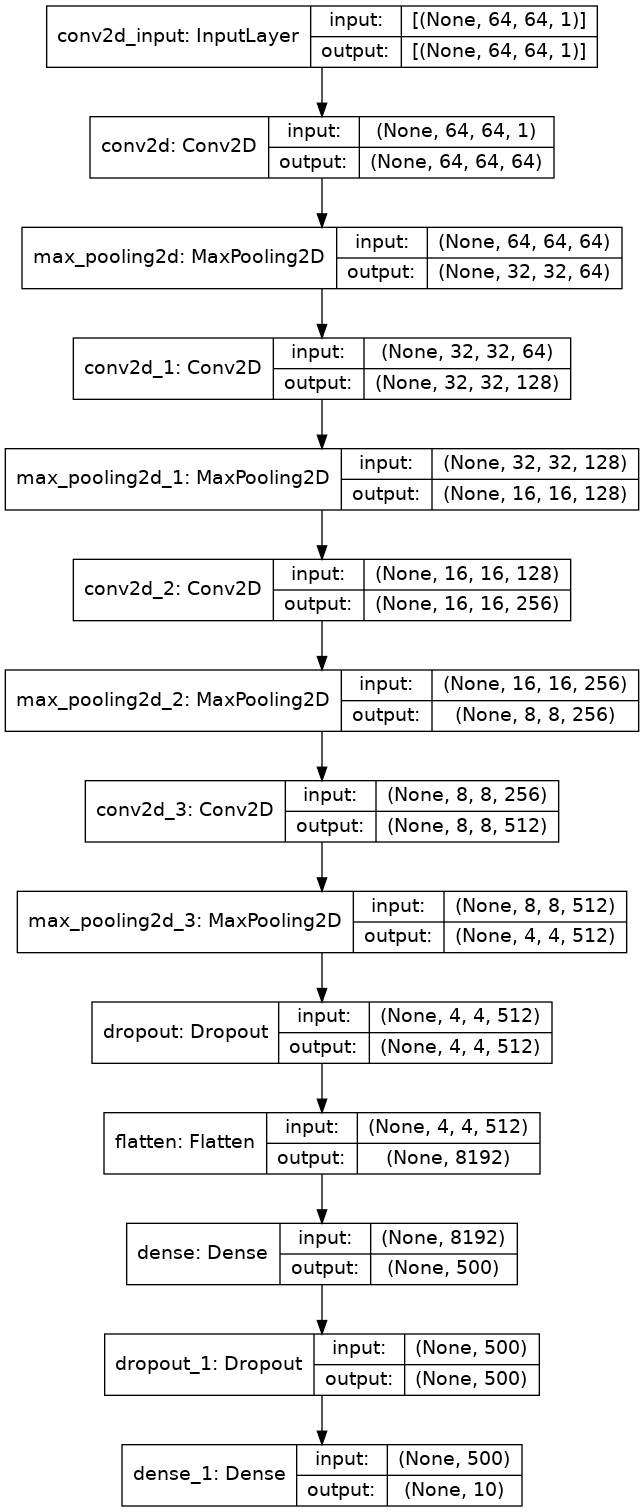

In [21]:
############################
#### Flowchart of Model ####
############################
from keras.utils.vis_utils import plot_model

plot_model(model,to_file=os.path.join(MODEL_PATH,"model_distracted_driver.png"),show_shapes=True,show_layer_names=True)

In [22]:
#########################
#### compiling model ####
#########################
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint

filepath = os.path.join(MODEL_PATH,"distracted-{epoch:02d}-{val_accuracy:.2f}.hdf5")
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max',save_freq='epoch')
callbacks_list = [checkpoint]

In [24]:
callbacks_list

In [25]:
#####################
### training model ##
#####################
model_history = model.fit(train_tensors,ytrain,validation_data = (valid_tensors, yvalid),epochs=25, batch_size=40, shuffle=True,callbacks=callbacks_list)

Epoch 1/25
449/449 [==============================] - 34s 66ms/step - loss: 1.8998 - accuracy: 0.2889 - val_loss: 0.3640 - val_accuracy: 0.8977

Epoch 00001: val_accuracy improved from -inf to 0.89766, saving model to /kaggle/working/model/self_trained/distracted-01-0.90.hdf5
Epoch 2/25
449/449 [==============================] - 29s 64ms/step - loss: 0.4405 - accuracy: 0.8513 - val_loss: 0.1567 - val_accuracy: 0.9505

Epoch 00002: val_accuracy improved from 0.89766 to 0.95050, saving model to /kaggle/working/model/self_trained/distracted-02-0.95.hdf5
Epoch 3/25
449/449 [==============================] - 29s 64ms/step - loss: 0.1785 - accuracy: 0.9447 - val_loss: 0.0756 - val_accuracy: 0.9810

Epoch 00003: val_accuracy improved from 0.95050 to 0.98105, saving model to /kaggle/working/model/self_trained/distracted-03-0.98.hdf5
Epoch 4/25
449/449 [==============================] - 29s 65ms/step - loss: 0.1228 - accuracy: 0.9633 - val_loss: 0.0580 - val_accuracy: 0.9860

Epoch 00004: val_a

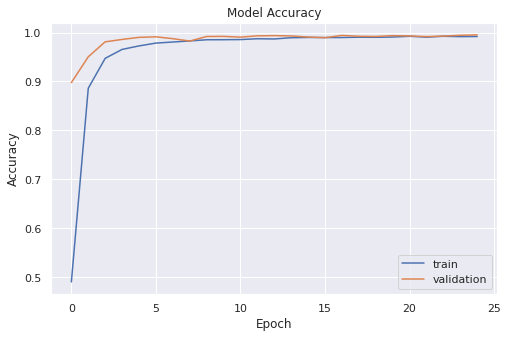

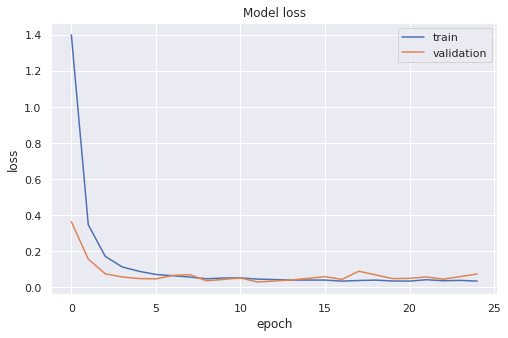

In [26]:
########################################################
#### plotting train & test model accuraccy and cost ####
########################################################
def plot_train_history(history = model_history):
    # Summarize history for accuracy
    plt.figure(figsize = (8, 5))
    #plt.xticks(np.arange(0, 10))
    #plt.yticks(np.arange(0, 100))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='lower right')
    plt.show()

    # Summarize history for loss
    plt.figure(figsize = (8, 5))
    #plt.xticks(np.arange(0, 10))
    #plt.yticks(np.arange(0, 100))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

plot_train_history(model_history)

In [27]:
#############################
#### confussion matrix ######
#############################
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )    
    fig = plt.figure(figsize=figsize)
    
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")  #Plot rectangular data as a color-encoded matrix.
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    fig.savefig(os.path.join(MODEL_PATH,"confusion_matrix.png"))
    
    return fig

In [28]:
from sklearn.metrics import confusion_matrix

def print_heatmap(n_labels, n_predictions, class_names):
    labels = n_labels                            
    predictions = n_predictions                  

    matrix = confusion_matrix(labels.argmax(axis=1),predictions.argmax(axis=1))
    row_sum = np.sum(matrix, axis = 1)
    w, h = matrix.shape

    c_m = np.zeros((w, h))

    for i in range(h):
        c_m[i] = matrix[i] * 100 / row_sum[i]
    c = c_m.astype(dtype = np.uint8)
    
    heatmap = print_confusion_matrix(c, class_names, figsize=(18,10), fontsize=20)

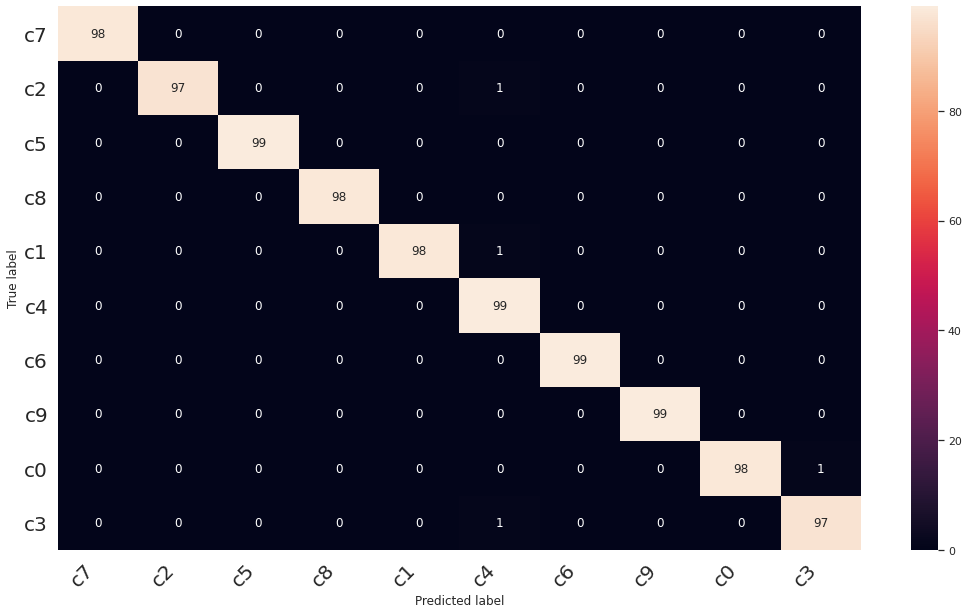

In [29]:
ypred_valid = model.predict(valid_tensors)
print_heatmap(yvalid,ypred_valid,labels_list)

In [30]:
ypred_class = np.argmax(ypred_valid,axis=1)
yvalid = np.argmax(yvalid,axis=1)

In [31]:
###################################################################
#### Predicting train accuraccy, precision, f-1 score & recall ####
###################################################################
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(yvalid,ypred_class)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(yvalid, ypred_class,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(yvalid,ypred_class,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(yvalid,ypred_class,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.987291
Precision: 0.987812
Recall: 0.987291
F1 score: 0.987397


In [32]:
data_test = pd.read_csv(os.path.join(os.getcwd(),"csv_files","test.csv"))
print('Data Test Shape (n_ imgs, classes) = ',data_test.shape, '\n\n')
data_test.head()

Data Test Shape (n_ imgs, classes) =  (79726, 2) 




,FileName,ClassName
0,../input/distracted-driver-dataset/imgs/test/i...,test
1,../input/distracted-driver-dataset/imgs/test/i...,test
2,../input/distracted-driver-dataset/imgs/test/i...,test
3,../input/distracted-driver-dataset/imgs/test/i...,test
4,../input/distracted-driver-dataset/imgs/test/i...,test


In [33]:
valid_tensors_test = paths_to_tensor(xvalid[100:150]).astype('float32')/255 - 0.5

100%|██████████| 50/50 [00:00<00:00, 175.21it/s]


In [34]:
valid_tensors_test.shape

(50, 64, 64, 1)

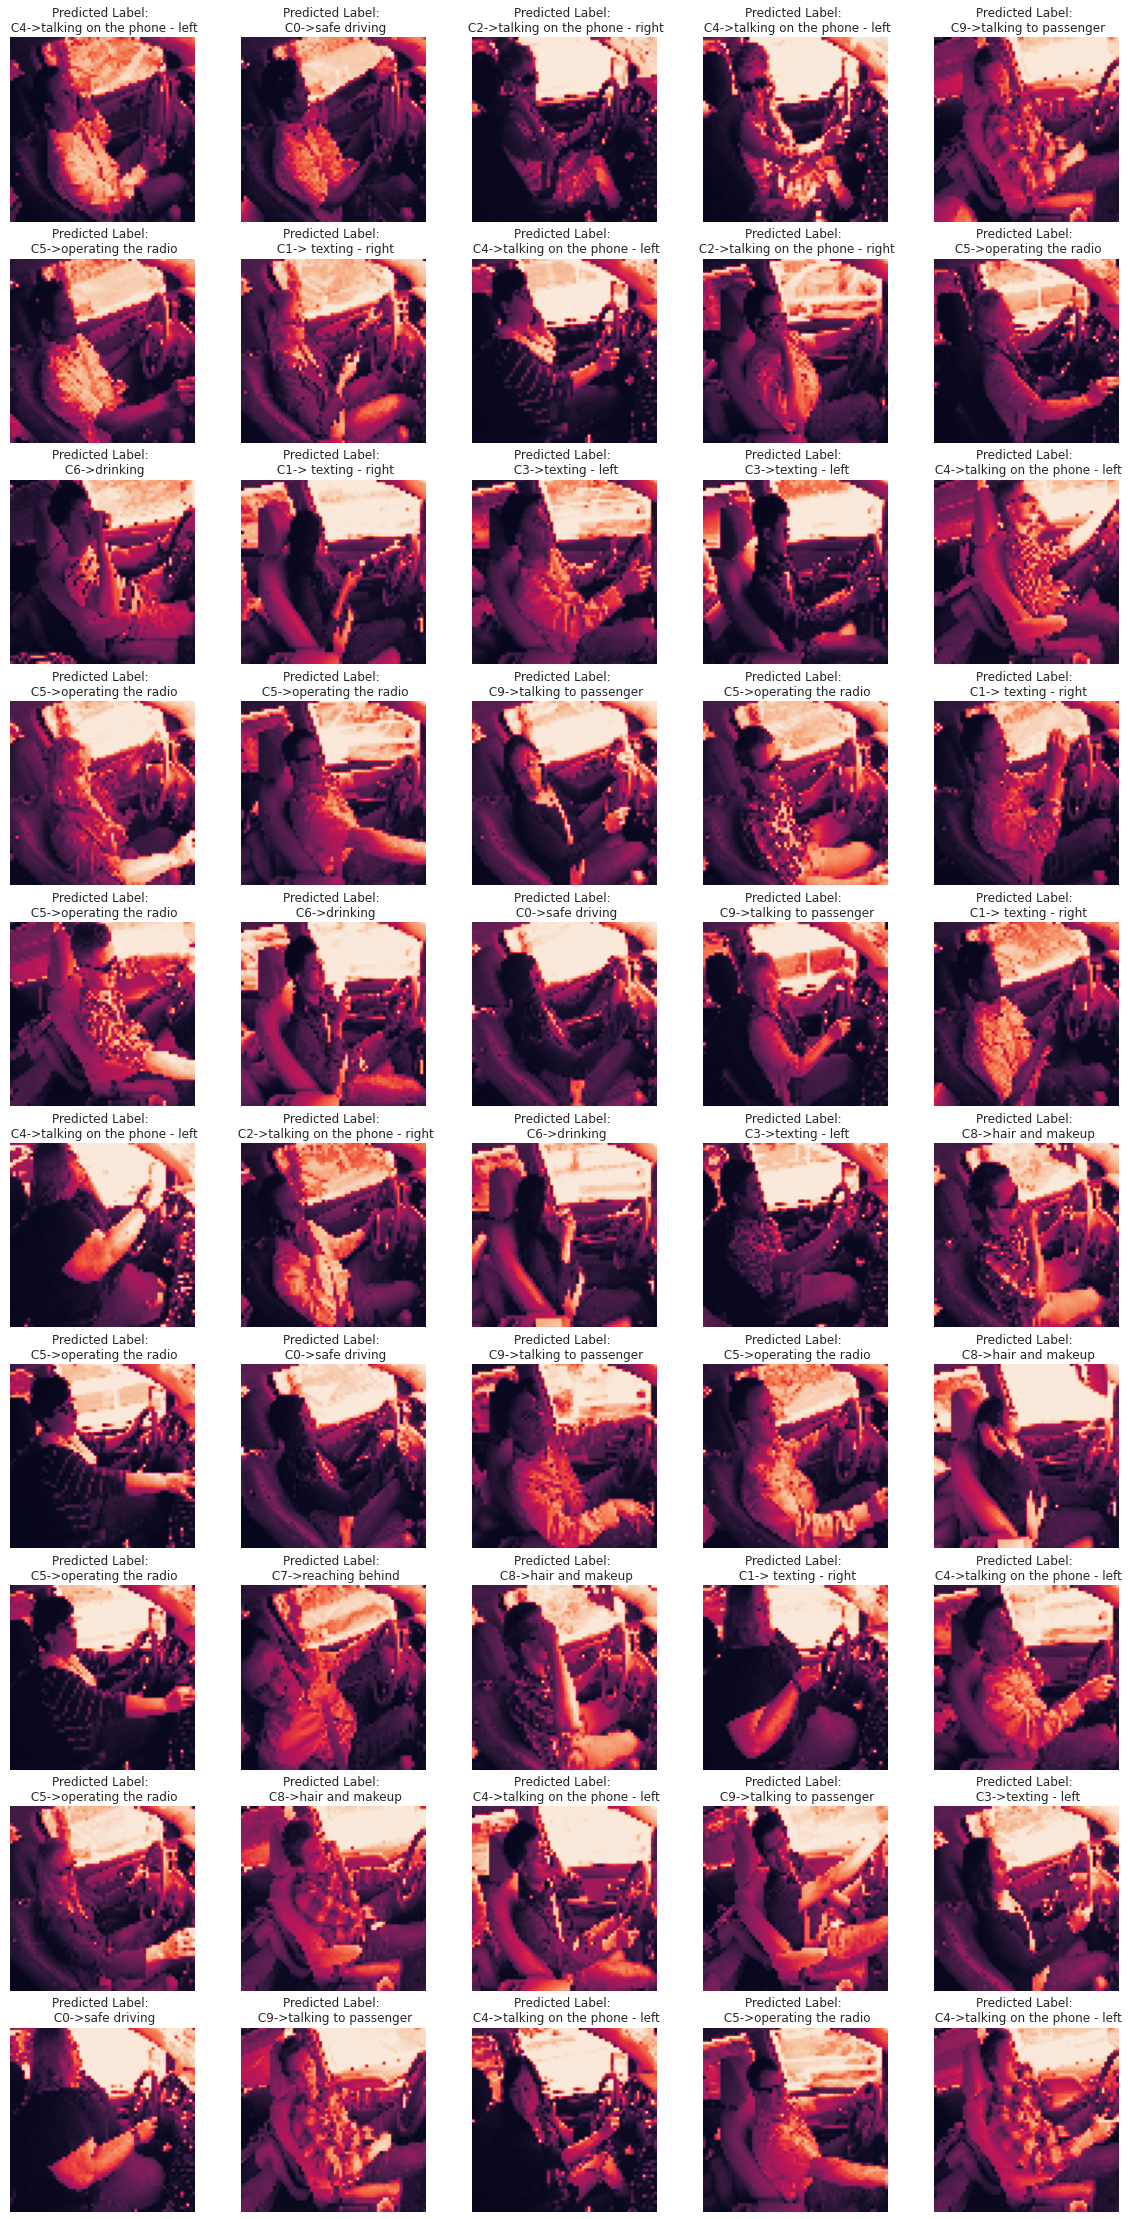

In [35]:
##########################################################
####### plotting images back from validation data ########
##########################################################
sns.set_style("whitegrid", {'axes.grid' : False})

import matplotlib.image as mpimg
# mapping categotical

classes = [ 'safe driving', ' texting - right', 'talking on the phone - right',
           'texting - left', 'talking on the phone - left', 'operating the radio',
           'drinking', 'reaching behind', 'hair and makeup', 'talking to passenger']



Predictions = model.predict(valid_tensors_test)
Predicted_Labels = np.argmax(Predictions, axis = 1)
fig = plt.figure(figsize = (20,40))

for i, labels in enumerate(Predicted_Labels):
    
    fig.add_subplot(10, 5, i+1)
    plt.imshow(valid_tensors_test[i][:][:])
    plt.axis('off')
    plt.title('Predicted Label: \n C{}->{}'.format(labels , classes[labels]))
    

In [36]:
Predicted_Labels[:15]

array([4, 0, 2, 4, 9, 5, 1, 4, 2, 5, 6, 1, 3, 3, 4])

In [37]:
#########################################################
####### converting test images to required shape ########
#########################################################
xtest=[i for i in data_test['FileName']]               

test_tensors = paths_to_tensor(xtest).astype('float32')/255 - 0.5

100%|██████████| 79726/79726 [17:41<00:00, 75.08it/s]


In [38]:
########################################################
###### predicting the accuraccy of the test data #######
########################################################
Predictions_test = model.predict(test_tensors)
Predicted_Labels_test = np.argmax(Predictions_test, axis = 1)
Predicted_Labels_test[:20]

array([5, 5, 5, 5, 5, 5, 5, 5, 7, 8, 0, 7, 1, 5, 5, 5, 5, 5, 5, 5])

In [39]:
Predictions_test

array([[0.06862411, 0.07016438, 0.06024684, ..., 0.1687755 , 0.09071597,
        0.10068244],
       [0.06862411, 0.07016438, 0.06024684, ..., 0.1687755 , 0.09071597,
        0.10068244],
       [0.06862411, 0.07016438, 0.06024684, ..., 0.1687755 , 0.09071597,
        0.10068244],
       ...,
       [0.06862411, 0.07016438, 0.06024684, ..., 0.16877548, 0.09071597,
        0.10068244],
       [0.06862411, 0.07016438, 0.06024684, ..., 0.16877548, 0.09071597,
        0.10068244],
       [0.06862411, 0.07016438, 0.06024684, ..., 0.16877548, 0.09071597,
        0.10068244]], dtype=float32)

In [40]:
xtest[:20]

['../input/distracted-driver-dataset/imgs/test/img_96590.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_32366.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_99675.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_85937.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_73903.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_89410.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_70462.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_45622.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_55507.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_34204.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_16279.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_73988.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_81791.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_39692.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_75098.jpg',
 '../input/distracted-driver-dataset/imgs/test/img_9117

In [43]:
##########################################################################################
####### converting the predicted test data into the submission format as mentioned #######
##########################################################################################
def submission_file(test_file, predicted_values):
    submission_file=list()
    img_names=list(img.split('/')[-1] for img in test_file)
    for img, pred_values in zip(img_names, predicted_values):
        #print(img, pred_values)
        row=list()
        row.append(img)
        row.append(value for value in pred_values)
        submission_file.append(row)
        #row.clear()
    subm_data = pd.DataFrame(submission_file) # create a DataFrame using Pandas 
    subm_data.to_csv(os.path.join(os.getcwd(),"csv_files",'submission_file'),index=False) # convert the DataFrame to CSV file
    return submission_file

In [44]:
submission_file(xtest, Predictions_test)

[['img_96590.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabe68d40d0>],
 ['img_32366.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabe68d4650>],
 ['img_99675.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabe68d4850>],
 ['img_85937.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabe68d48d0>],
 ['img_73903.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabe68d46d0>],
 ['img_89410.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabe68d4350>],
 ['img_70462.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabd437ad50>],
 ['img_45622.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabd437af50>],
 ['img_55507.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabd437acd0>],
 ['img_34204.jpg',
  <generator object submission_file.<locals>.<genexpr> at 0x7fabd437ac50>],
 ['img_16279.jpg',
  <generator object submission_